In [20]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

In [4]:
# Load the Dataset

mnist = tf.keras.datasets.mnist

In [5]:
## Training and Testing the dataset

In [9]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("Training\n", x_train)
print("\n")
print("Testing\n", x_test)

Training
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Testing
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ..

In [10]:
x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))

In [11]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

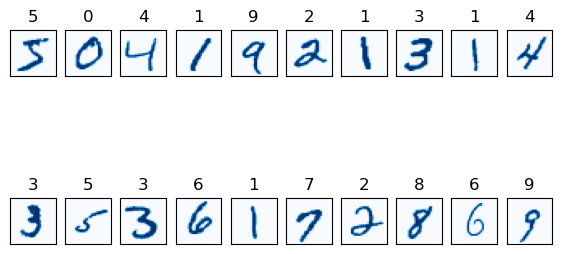

In [15]:
# Visualizing dataset

fig=plt.figure(figsize=(7,4))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [14]:
img_shape= x_train.shape[1:]

In [16]:
## Neural Network

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
prediction = model(x_train[:1]).numpy()
prediction

array([[-0.27482852, -0.7097579 , -0.19383088, -0.19063088,  0.5751493 ,
        -0.29563653, -0.3053008 , -0.25741184,  0.2237586 ,  0.64836454]],
      dtype=float32)

In [23]:
tf.nn.softmax(prediction).numpy()

array([[0.07524573, 0.04870734, 0.08159409, 0.0818556 , 0.17604452,
        0.0736962 , 0.0729874 , 0.07656774, 0.12388408, 0.18941724]],
      dtype=float32)

In [24]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [25]:
## Model Evaluation

In [26]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2992 - accuracy: 0.9134
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1075 - accuracy: 0.9670
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0758 - accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0584 - accuracy: 0.9813
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9833
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0483 - accuracy: 0.9839
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.044

In [27]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0704 - accuracy: 0.9783 - 506ms/epoch - 2ms/step


[0.07035432010889053, 0.9782999753952026]

In [28]:
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:10])

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[5.20794341e-09, 4.15267473e-12, 2.21062646e-06, 2.35231198e-07,
        2.02394542e-15, 1.64326552e-09, 1.15339909e-14, 9.99997377e-01,
        6.24496854e-09, 1.12080969e-07],
       [2.34529648e-12, 2.91908373e-06, 9.99997020e-01, 6.28288754e-09,
        7.02610767e-20, 2.09305555e-12, 1.81210743e-12, 1.04174210e-15,
        7.24092675e-10, 4.68647572e-18],
       [1.33466775e-08, 9.99845266e-01, 2.32212260e-05, 2.76048837e-07,
        4.27440455e-06, 7.00807057e-09, 1.89619857e-06, 7.08980151e-05,
        5.41268673e-05, 3.71420694e-09],
       [9.99952674e-01, 1.33269140e-09, 3.61048369e-05, 3.87599641e-09,
        2.47872212e-09, 7.50951642e-07, 6.73394379e-06, 1.16776357e-08,
        1.08686025e-10, 3.81359973e-06],
       [1.21883602e-07, 3.89842065e-12, 1.31287402e-06, 3.70140064e-11,
        9.96334195e-01, 6.14577989e-09, 1.06125071e-06, 1.80419756e-05,
        5.14114573e-09, 3.64526967e-03],
       [2.55641008e-10, 9

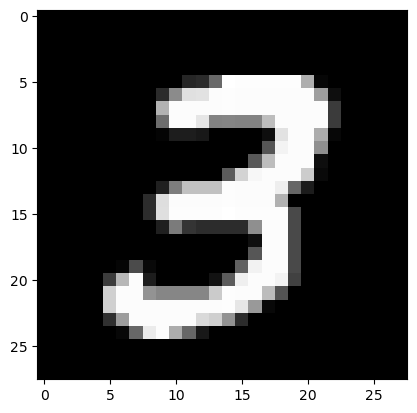

In [29]:
img = x_train[7]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [30]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 70ms/step
predicted : 3
